In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# The path to our CSV file
file = "AB_NYC_2019_clean.csv"

# Read file data into pandas
NYC_2019 = pd.read_csv(file, index_col=0)
NYC_2019.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [3]:
#descriptive data by neighbourhood 
mean = NYC_2019.groupby('neighbourhood')['number_of_reviews'].mean()
median = NYC_2019.groupby('neighbourhood')['number_of_reviews'].median()
total = NYC_2019.groupby('neighbourhood')['number_of_reviews'].count()


summ_stats = pd.DataFrame ({"Mean Number of Reviews": mean, "Median Number of Reviews":median, 
                            "Number of Reviews":total})
summ_stats


,Mean Number of Reviews,Median Number of Reviews,Number of Reviews
neighbourhood,,,
Allerton,42.928571,27.0,42
Arden Heights,7.750000,5.0,4
Arrochar,14.619048,11.0,21
Arverne,29.259740,15.0,77
Astoria,21.455556,5.0,900
...,...,...,...
Windsor Terrace,27.541401,7.0,157
Woodhaven,31.727273,8.0,88
Woodlawn,44.000000,7.0,11


In [4]:
#Groupby Burrough 
mean = NYC_2019.groupby('neighbourhood_group')['number_of_reviews'].mean()
median = NYC_2019.groupby('neighbourhood_group')['number_of_reviews'].median()
total = NYC_2019.groupby('neighbourhood_group')['number_of_reviews'].count()


summ_stats2 = pd.DataFrame ({"Mean Number of Reviews": mean, "Median Number of Reviews":median, 
                            "Number of Reviews":total})
summ_stats2


,Mean Number of Reviews,Median Number of Reviews,Number of Reviews
neighbourhood_group,,,
Bronx,26.004583,9,1091
Brooklyn,24.202845,6,20104
Manhattan,20.985596,4,21661
Queens,27.700318,7,5666
Staten Island,30.941019,12,373


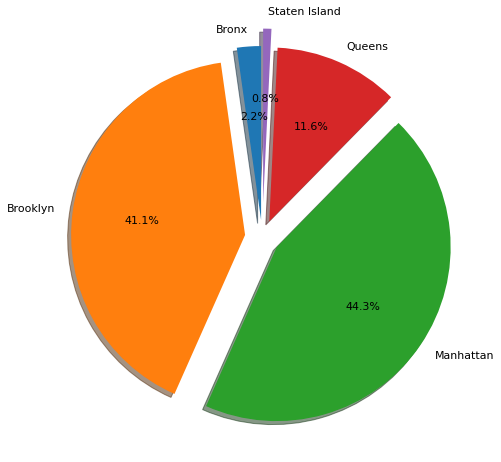

In [49]:
# Generate a pie plot showing the distribution of neighbourhoods by bourough 
Hood_df=pd.DataFrame(NYC_2019.groupby(['neighbourhood_group']).count())
#Hood_df.head()
explodeTuple = (0.1, 0.1, 0.1, 0.1, 0.2)
Hood_df.plot.pie(y='host_id', autopct='%1.1f%%', explode=explodeTuple, startangle = 90, legend=False, 
                 shadow=True, figsize=(8,8), fontsize=11)
plt.title= ("Burrough Distribution")
plt.ylabel("")
plt.savefig("Distribution of neighborhoods by bourough")

In [40]:
#Generate seperate Data frames of each burrough
brooklyn_df =NYC_2019.loc[(NYC_2019["neighbourhood_group"]== "Brooklyn")]
manhattan_df =NYC_2019.loc[(NYC_2019["neighbourhood_group"]== "Manhattan")]
queens_df =NYC_2019.loc[(NYC_2019["neighbourhood_group"]== "Queens")]
staten_df =NYC_2019.loc[(NYC_2019["neighbourhood_group"]== "Staten Island")]
bronx_df =NYC_2019.loc[(NYC_2019["neighbourhood_group"]== "Bronx")]
#bronx_df.head()

In [41]:
#brooklyn_df.head()

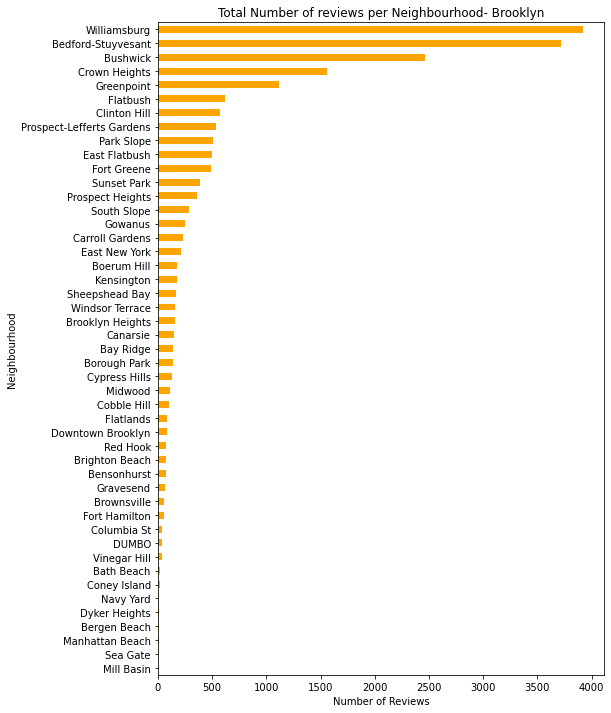

In [42]:
# Generate a bar plot showing the total number of reviews for all neighbourhoods for each bourough
pd_bar_plot= pd.DataFrame(brooklyn_df.groupby(['neighbourhood']).count()).reset_index()
brook_sorted_desc= pd_bar_plot.sort_values('number_of_reviews',ascending=True)
pd_barplot = brook_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="barh", x='neighbourhood', title = 'Total Number of reviews per Neighbourhood- Brooklyn',figsize=(8,12),
                legend = False, color='orange')
plt.ylabel('Neighbourhood')
plt.xlabel("Number of Reviews")
plt.savefig("Brooklyn_Reviews_by_Neighborhood.png")

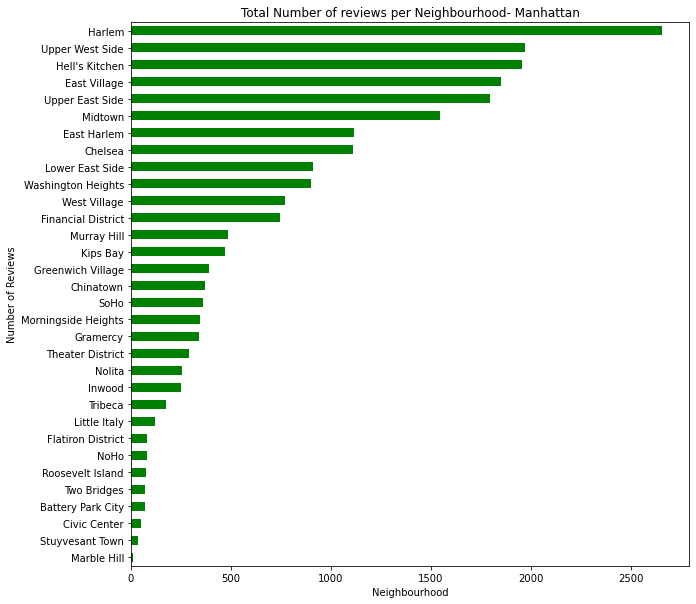

In [43]:
# Generate a bar plot showing the total number of reviews for all neighbourhoods for each bourough
pd_bar_plot= pd.DataFrame(manhattan_df.groupby(['neighbourhood']).count()).reset_index()
manhat_sorted_desc= pd_bar_plot.sort_values('number_of_reviews',ascending=True)
pd_barplot = manhat_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="barh", x='neighbourhood', title = 'Total Number of reviews per Neighbourhood- Manhattan', 
                    legend = False, figsize=(10,10), color='green')
plt.xlabel('Neighbourhood')
plt.ylabel("Number of Reviews")
plt.savefig("Manhattan_Reviews_by_Neighborhood.png")

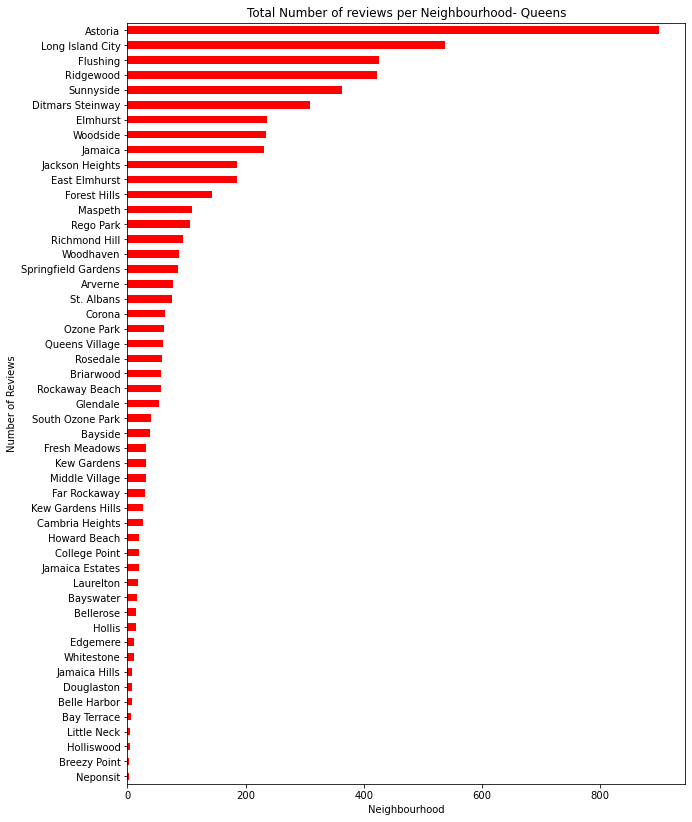

In [44]:
# Generate a bar plot showing the total number of reviews for all neighbourhoods for each bourough
pd_bar_plot= pd.DataFrame(queens_df.groupby(['neighbourhood']).count()).reset_index()
queens_sorted_desc= pd_bar_plot.sort_values('number_of_reviews',ascending=True)
pd_barplot = queens_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="barh", x='neighbourhood', title = 'Total Number of reviews per Neighbourhood- Queens', 
                    legend = False, figsize=(10,14), color='red')
plt.xlabel('Neighbourhood')
plt.ylabel("Number of Reviews")
plt.savefig("Queens_Reviews_by_Neighborhood.png")

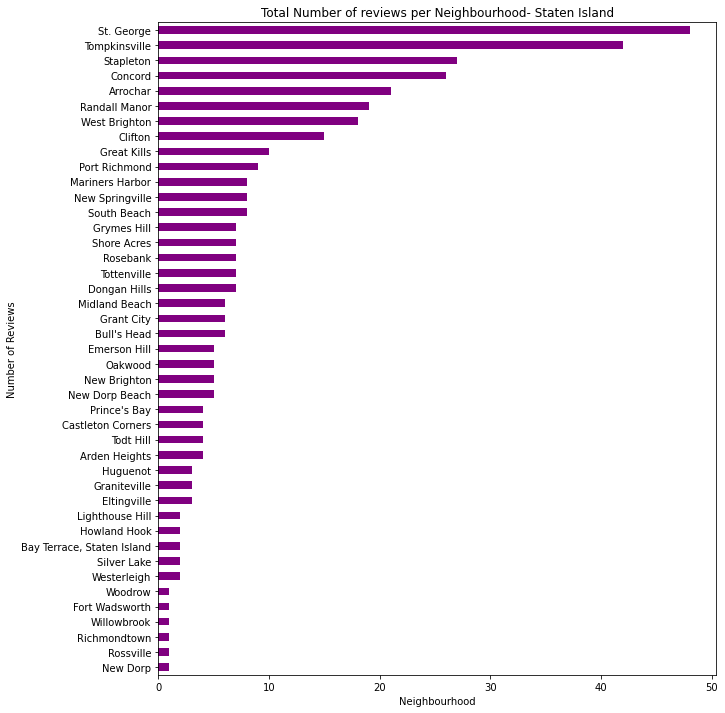

In [45]:
# Generate a bar plot showing the total number of reviews for all neighbourhoods for each bourough
pd_bar_plot= pd.DataFrame(staten_df.groupby(['neighbourhood']).count()).reset_index()
staten_sorted_desc= pd_bar_plot.sort_values('number_of_reviews',ascending=True)
pd_barplot = staten_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="barh", x='neighbourhood', title = 'Total Number of reviews per Neighbourhood- Staten Island', 
                    legend = False, figsize=(10,12), color='purple')
plt.xlabel('Neighbourhood')
plt.ylabel("Number of Reviews")
plt.savefig("Staten_Island_Reviews_by_Neighborhood.png")

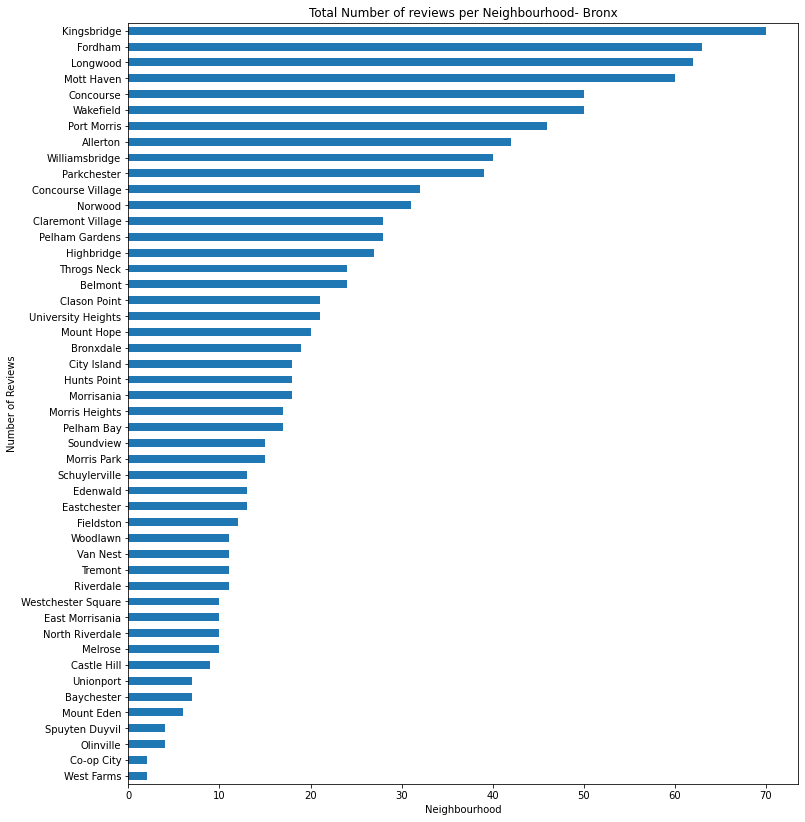

In [46]:
# Generate a bar plot showing the total number of reviews for all neighbourhoods for each bourough
pd_bar_plot= pd.DataFrame(bronx_df.groupby(['neighbourhood']).count()).reset_index()
bronx_sorted_desc= pd_bar_plot.sort_values('number_of_reviews',ascending=True)
pd_barplot = bronx_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="barh", x='neighbourhood', title = 'Total Number of reviews per Neighbourhood- Bronx', 
                    legend = False, figsize=(12,14))
plt.xlabel('Neighbourhood')
plt.ylabel("Number of Reviews")
plt.savefig("Bronx_Reviews_by_Neighborhood.png")

In [47]:
mean = NYC_2019.groupby('neighbourhood_group')['price'].mean()
median = NYC_2019.groupby('neighbourhood_group')['price'].median()
summ_stats3 = pd.DataFrame ({"Mean Price": mean, "Median Price":median})
summ_stats3

,Mean Price,Median Price
neighbourhood_group,,
Bronx,87.496792,65
Brooklyn,124.383207,90
Manhattan,196.875814,150
Queens,99.517649,75
Staten Island,114.812332,75
